## Advent of Code 2022

In [1]:
from aocd import get_data

### Day One

In [2]:
data = get_data(day=1, year=2022)

In [3]:
# Part One

elves = [elf.split("\n") for elf in data.split("\n\n")]
calories = [sum([int(calories) for calories in elf]) for elf in elves]
max(calories)

68787

In [4]:
# Part Two

sum(sorted(calories, reverse=True)[:3])

198041

### Day Two

In [5]:
data = get_data(day=2, year=2022)

In [6]:
# Part One

games = [(line[0], line[2]) for line in data.splitlines()]
translate = {"A": "rock", "B": "paper", "C": "scissors", "X": "rock", "Y": "paper", "Z": "scissors"}
games = [(translate[game[0]], translate[game[1]]) for game in games]

shape_scores = [{"rock": 1, "paper": 2, "scissors": 3}[game[1]] for game in games]
winners = [("rock", "paper"), ("paper", "scissors"), ("scissors", "rock")] # Loser < Winner
outcome_scores = [6 if game in winners else 3 if game[0]==game[1] else 0 for game in games]

sum([shape+outcome for (shape, outcome) in zip(shape_scores, outcome_scores)])

13924

In [7]:
# Part Two

games = [(line[0], line[2]) for line in data.splitlines()]
translate = {"A": "rock", "B": "paper", "C": "scissors", "X": "lose", "Y": "draw", "Z": "win"}
games = [(translate[game[0]], translate[game[1]]) for game in games]

shape_scores = {"rock": 1, "paper": 2, "scissors": 3}
winners = ["paper", "scissors", "rock"]
losers = ["rock", "paper", "scissors"]

def score(game):
    if game[1]=="draw":
        return (3, shape_scores[game[0]])
    elif game[1]=="win":
        return (6, shape_scores[winners[losers.index(game[0])]])
    elif game[1]=="lose":
        return (0, shape_scores[losers[winners.index(game[0])]])

scores = [score(game) for game in games]
sum([outcome + shape for (outcome, shape) in scores])

13448

In [8]:
# Part Two with a deque instead of winners/losers lists

from collections import deque

games = [(line[0], line[2]) for line in data.splitlines()]

shape_scores = {"A": 1, "B": 2, "C": 3}
winners = deque(["A", "B", "C"])

def score(game):
    while winners.index(game[0])!=1:
        winners.rotate() # Rotate until opponent's choice in middle
    if game[1]=="X":
        return shape_scores[winners[0]]
    elif game[1]=="Y":
        return 3 + shape_scores[winners[1]]
    elif game[1]=="Z":
        return 6 + shape_scores[winners[2]]

sum([score(game) for game in games])

13448

### Day Three

In [9]:
data = get_data(day=3, year=2022)

In [10]:
# Part One

import string

sacks = data.splitlines()
common_items = [set(sack[:len(sack)//2]) & set(sack[len(sack)//2:]) for sack in sacks]
alphabet = string.ascii_lowercase + string.ascii_uppercase
sum([alphabet.index(item)+1 for item, in common_items])

7889

In [11]:
# Part Two

def score(i):
    badge, = set(sacks[i-1]) & set(sacks[i]) & set(sacks[i+1])
    return alphabet.index(badge)+1

sum([score(i) for i in range(1, len(sacks)+1, 3)])

2825

In [12]:
# Part Two -- bit clearer

def score(group):
    badge, = set(group[0]) & set(group[1]) & set(group[2])
    return alphabet.index(badge)+1

sum([score(sacks[i:i+3]) for i in range(0, len(sacks), 3)])

2825

In [13]:
# Part Two with `chunked` from more_itertools

from more_itertools import chunked

def score(group):
    badge, = set(group[0]) & set(group[1]) & set(group[2])
    return alphabet.index(badge)+1

sum([score(group) for group in chunked(sacks, 3)])

2825

### Day Four

In [14]:
data = get_data(day=4, year=2022)

In [15]:
# Part One

pairs = [pair.split(",") for pair in data.splitlines()]
edges = [[edge.split("-") for edge in elf] for elf in pairs]
ranges = [[set(range(int(e[0]), int(e[1])+1)) for e in edge] for edge in edges]
sum([1 for elf in ranges if elf[0] <= elf[1] or elf[0] >= elf[1]])

431

In [16]:
# Part Two

sum([1 for elf in ranges if elf[0] & elf[1]])

823

### Day Five

In [17]:
data = get_data(day=5, year=2022)

In [18]:
# Part One

import re
import copy

""" # First approach to parsing stacks with regex -- but prefer reading nth char as below
stacks, rearrangement = data.split("\n\n")
stack_count = int((max(re.findall(r"\d+", stacks.splitlines()[-1]))))
stacks = [re.finditer(r"\[([A-Z])\]", stack) for stack in stacks.splitlines()[:-1]]
crates = {i+1: [] for i in range(stack_count)}

for stack in stacks:
    for crate in stack:
        crates[int(crate.start()/4)+1].append(crate.groups()[0])
"""

stacks, instructions = data.split("\n\n")
stacks = [list(stack[1::4]) for stack in stacks.splitlines()[:-1]] # Read every 4th char
stacks = [list(stack) for stack in zip(*stacks)] # Transpose list of lists
stacks = {k+1: [crate for crate in stack if not crate.isspace()] for k, stack in enumerate(stacks)}

stacks_rearranged = copy.deepcopy(stacks)
        
for instruction in instructions.splitlines():
    quantity, source, target = [int(i) for i in re.findall(r"\d+", instruction)]
    for q in range(quantity):
        stacks_rearranged[target].insert(0, stacks_rearranged[source].pop(0))

"".join([stacks_rearranged[k][0] for k in sorted(stacks_rearranged.keys())])

'BZLVHBWQF'

In [19]:
# Part Two

stacks_rearranged = copy.deepcopy(stacks)

for instruction in instructions.splitlines():
    quantity, source, target = [int(i) for i in re.findall(r"\d+", instruction)]
    stacks_rearranged[target][:0] = stacks_rearranged[source][:int(quantity)]
    stacks_rearranged[source] = stacks_rearranged[source][int(quantity):]

"".join([stacks_rearranged[k][0] for k in sorted(stacks_rearranged.keys())])

'TDGJQTZSL'

### Day Six

In [20]:
data = get_data(day=6, year=2022)

In [21]:
%time

# Part One

from more_itertools import windowed

marker = [marker for marker in windowed(data, 4) if len(set(marker))==4][0]
data.find("".join(marker))+4

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


1802

In [22]:
# Part Two

marker = [marker for marker in windowed(data, 14) if len(set(marker))==14][0]
data.find("".join(marker))+14

3551

In [23]:
%%time

# Part One -- trying a deque

signal = list(data)
marker = deque(4*[], 4)
i=0
while len(set(marker))!=4:
    marker.append(signal.pop(0))
    i+=1
i

CPU times: user 5.59 ms, sys: 160 µs, total: 5.75 ms
Wall time: 6.34 ms


1802

### Day Seven

In [24]:
data = get_data(day=7, year=2022)

In [25]:
# Part One

from anytree import Node, RenderTree, search, PreOrderIter

commands = data.split("$ ")[1:]
commands = [(cmd[:cmd.find("\n")], cmd[cmd.find("\n")+1:].splitlines()) for cmd in commands]

cwd = [Node("/", size=0)]

for cmd, resp in commands[1:]:
    if cmd=="ls":
        files = [(file.split()[1], file.split()[0]) for file in resp]
        names = [file.split()[1] for file in resp]
        sizes = [int(file.split()[0]) if file.split()[0].isdigit() else 0 for file in resp]
        [Node(name, parent=cwd[-1], size=size) for name, size in zip(names, sizes)]
    elif cmd.startswith("cd"):
        target = cmd.split()[1]
        if target == "..":
            cwd.pop()
        else:
            cwd.append(search.find(cwd[-1], lambda node: node.name==target and node.parent==cwd[-1]))

total = 0
for parent in PreOrderIter(cwd[0]):
    size = sum([node.size for node in PreOrderIter(parent)])
    if parent.size == 0 and size < 100000:
        total += size
total

1084134

In [26]:
# Part Two

used = sum([node.size for node in PreOrderIter(cwd[0])])
remaining = 70000000-used
to_find = 30000000-remaining

folders = []
for parent in PreOrderIter(cwd[0]):
    size = sum([node.size for node in PreOrderIter(parent)])
    if parent.size == 0:
        folders.append({"dir": parent, "size": size})

folders = sorted(folders, key=lambda folder: folder["size"])
min(folders, key=lambda folder: abs(folder["size"]-to_find))["size"]

6183184

In [27]:
#for pre, fill, node in RenderTree(cwd[0]):
#    print(pre, node.name, node.size)

### Day Eight

In [28]:
data = get_data(day=8, year=2022)

In [29]:
# Part One

from io import StringIO
import numpy as np

trees = np.genfromtxt(StringIO(data), delimiter=1, dtype=int)

def is_visible(y,x):
    lines = [
        trees[y,:x], # Line of trees between y, x and... the left edge
        trees[y,x+1:], # ... right edge
        trees[:y,x], # ... top edge
        trees[y+1:,x] # ... bottom edge
    ]
    if any(all(tree<trees[y,x] for tree in line) for line in lines):
        return True

[is_visible(y,x) for y, x in np.ndindex(trees.shape)].count(True)

1763

In [30]:
# Part Two

def scenic_score(y,x):
    lines = [
        reversed(trees[y,:x]), # Towards the left
        trees[y,x+1:], # Towards the right
        reversed(trees[:y,x]), # Towards the top
        trees[y+1:,x] # Towards the bottom
    ]
    views = 4*[0]
    for direction, line in enumerate(lines):
        for tree in line:
            views[direction]+=1
            if trees[y,x] <= tree:
                break
    return np.product(views)

max(scenic_score(y,x) for y, x in np.ndindex(trees.shape))

671160

### Day Nine

In [31]:
data = get_data(day=9, year=2022)

In [32]:
from shapely.geometry import Point, MultiPoint
from shapely.affinity import translate
from shapely.ops import nearest_points
from math import sqrt

motions = [(motion.split()[0], int(motion.split()[1])) for motion in data.splitlines()]

H = Point(0,0)
T = Point(0,0)
T_trail = [T]
lookup = {"R": {"xoff": 1}, "L": {"xoff": -1}, "U": {"yoff": 1}, "D": {"yoff": -1}}

for direction, distance in motions:
    for step in range(1, distance+1):
        H = translate(H, **lookup[direction])
        if T.distance(H)>sqrt(2): # Don't snap T to H's buffer if it's diagonal to H
            buffer = H.buffer(1, resolution=1) # Square buffer with vertices at cardinals
            points = MultiPoint([p for p in buffer.exterior.coords])
            T, _ = nearest_points(points, T)
        T_trail.append(T)

len(set([(round(T.coords[0][0]), round(T.coords[0][1])) for T in T_trail]))

6332

### Day Ten

In [33]:
data = get_data(day=10, year=2022)

In [34]:
cycles = {cycle: register for cycle, register in zip(range(1, 241), [None]*240)}
cycle = 1
register = 1

for op in data.splitlines():
    if op == "noop":
        cycles[cycle]=register
        cycle+=1
    elif op.startswith("addx"):
        cycles[cycle]=register
        cycle+=1
        cycles[cycle]=register
        cycle+=1
        register+=int(op.split()[1])

sum([i*cycles[i] for i in [20, 60, 100, 140, 180, 220]])

14820

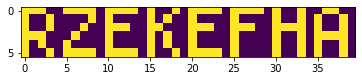

In [35]:
from more_itertools import chunked
import numpy as np
import matplotlib.pyplot as plt

pixels = np.zeros((6,40))

for row, cycle_chunk in enumerate(chunked(cycles.values(), 40)):
    for cycle, register in enumerate(cycle_chunk):
        if cycle in range(register-1, register+2):
            pixels[row][cycle]=1

plt.imshow(pixels.astype(float))

### Day Twelve

In [36]:
data = get_data(day=12, year=2022)

In [37]:
# Part One

from io import StringIO
import numpy as np
import networkx as nx

heightmap = np.genfromtxt(StringIO(data), delimiter=1, dtype=str)
start = tuple(np.dstack(np.where(heightmap=="S"))[0][0])
end = tuple(np.dstack(np.where(heightmap=="E"))[0][0])
heightmap[start] = "a"
heightmap[end] = "z"
heightmap = heightmap.view(np.uint32)-97

G = nx.DiGraph()
for y, x in np.ndindex(heightmap.shape):
    neighbours = [(y-1, x), (y+1, x), (y, x+1), (y, x-1)]
    for neighbour in neighbours:
        if 0 <= neighbour[0] < heightmap.shape[0] and 0 <= neighbour[1] < heightmap.shape[1]:
            if heightmap[neighbour] <= heightmap[y, x]+1:
                G.add_edge((y,x), neighbour)
                G.nodes[(y,x)]["value"] = heightmap[y,x]

#labels = nx.get_node_attributes(G, "value")
#nx.draw(G, with_labels=True, labels=labels, arrows=True)

len(nx.shortest_path(G, start, end))-1

437

In [38]:
# Part Two

starts = tuple(np.dstack(np.where(heightmap==ord("a")-97)))

steps = []
for start in starts[0]:
    try:
        steps.append(len(nx.shortest_path(G, tuple(start), end)))
    except nx.NetworkXNoPath:
        pass

min(steps)-1

430